# Interpolation

numpy and scipy

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

In [12]:
def linfunc(m,x,c):
    return m * x + c

Text(0.5, 0, 'Time (decimal year)')

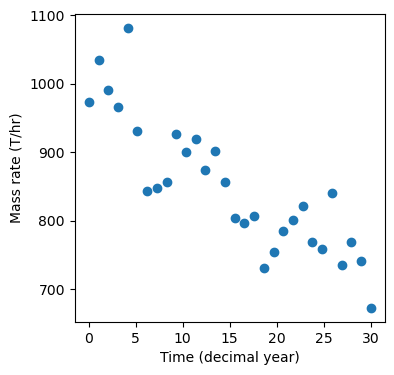

In [19]:
# generate some x data
x_data = np.linspace(0, 30, 30)

# use the exponential function to generate the y data
y_data = linfunc(-10, x_data, 1000)

# use a random number generator to generate some noise
random_numgen = np.random.default_rng()
noise_y = 50 * random_numgen.normal(size=x_data.size)

# add noise to the y data
data_y = y_data + noise_y

# plot the resulting x, y data
fig, ax = plt.subplots(1,1, figsize=(4,4))
ax.scatter(x_data, data_y, label='data')
ax.set_ylabel('Mass rate (T/hr)')
ax.set_xlabel('Time (decimal year)')

In [34]:
# linear model

model = np.poly1d(np.polyfit(
    x_data,
    y_data,
    1 # first order polynomial
    ))

print('Correlation equation ', model)

correlation_slope = model[1]
correlation_intersect = model[0]

# calculate values from the correlation to plot with the data data
y_modelled = []

for val in x_data:
    # manually edit the equation below to fit the model given above
    y = correlation_slope * val + correlation_intersect
    y_modelled.append(y)

Correlation equation   
-10 x + 1000


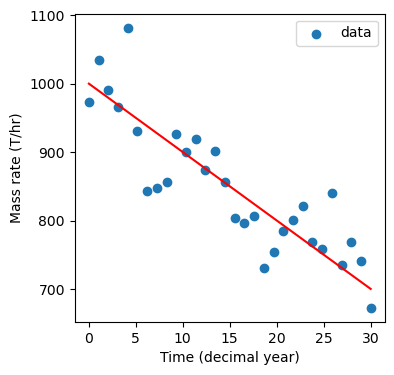

In [35]:
# plot the resulting x, y data
fig, ax = plt.subplots(1,1, figsize=(4,4))
ax.scatter(x_data, data_y, label='data')
ax.plot(
    x_data, 
    y_modelled, 
    'r-',
    #label= model
    )
ax.set_ylabel('Mass rate (T/hr)')
ax.set_xlabel('Time (decimal year)')
ax.legend()

Use non-linear least squares to fit the function to the data

scipy.optimize.curve_fit(f, xdata, ydata, sigma=None, p0=None, absolute_sigma=True, bounds=(- inf, inf), check_finite=True, jac=None, method=None)

https://pythonguides.com/python-scipy-exponential/

Exponential decline analysis 

Fit model to data arranged as:
- y = mass rate (eg t/hr)
- x = time, where time 0 = the start of the data

$y=c_1 e^{-c 2 x}$

- c1 = mass rate at time zero (must be zero)
- c2 = is decline rate in mass rate per year

In [2]:
def expfunc(x, c1, c2, s):
    return c1 * np.exp(-c2 * x) + s

Text(0.5, 0, 'Time (decimal year)')

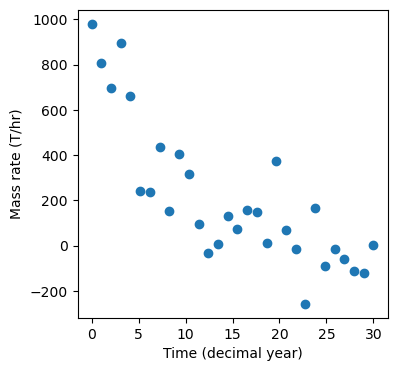

In [4]:
# generate some x data
x_data = np.linspace(0, 30, 30)

# use the exponential function to generate the y data
y_data = expfunc(x_data, 1000, 0.15, 1)

# use a random number generator to generate some noise
random_numgen = np.random.default_rng()
noise_y = 150 * random_numgen.normal(size=x_data.size)

# add noise to the y data
data_y = y_data + noise_y

# plot the resulting x, y data
fig, ax = plt.subplots(1,1, figsize=(4,4))
ax.scatter(x_data, data_y, label='data')
ax.set_ylabel('Mass rate (T/hr)')
ax.set_xlabel('Time (decimal year)')

C:\Users\Irene\AppData\Local\Temp\ipykernel_40844\1414566452.py:2: RuntimeWarning: overflow encountered in exp
  return c1 * np.exp(-c2 * x) + s


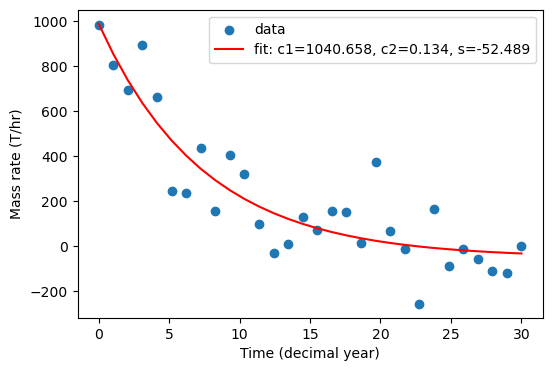

In [10]:
# use scipy optimize to fit exponential function to the data
p_opt, p_cov = optimize.curve_fit(expfunc, x_data, data_y)

fig, ax = plt.subplots(1,1,figsize=(6,4))
ax.scatter(x_data, data_y, label='data')
ax.plot(x_data, expfunc(x_data, *p_opt), 'r-',
        label='fit: c1=%5.3f, c2=%5.3f, s=%5.3f' % tuple(p_opt)
        )
ax.legend()
ax.set_ylabel('Mass rate (T/hr)')
ax.set_xlabel('Time (decimal year)');